# Analysis of Netflix Content Engagement

탐색적 데이터 분석(EDA) 목표

- 누적된 시청 시간을 정량화하고 시간에 따른 분포를 평가
- 장르가 콘텐츠 인기에 미치는 영향을 평가 > 평점과 시청률 기준
- 여러 참여 지표를 종합하여 '인기 지수'를 개발하여 성공을 종합적으로 측정
- 실질적으로 활용가능한 인사이트 제공

## Step 1: Data Preprocessing

In preparation for analysis, the dataset was first pruned of duplicate records to avoid skewed insights, with indices reset for consistency. The 'Genre' column underwent a cleaning process to strip extraneous characters, facilitating categorical analysis. To differentiate content, a 'Type' column was introduced, classifying titles as 'TV Show' or 'Movie' based on the occurrence of 'Season' in their titles. Lastly, the 'Hours Viewed', 'Rating', and 'Number of Ratings' columns were transformed from strings to numeric types, discarding non-numeric characters and handling any non-conformities by coercing to NaN, ensuring the dataset was primed for quantitative evaluation.


In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

#Read in data and check shape
df = pd.read_csv('../data/total_netflix_2023 new.csv')
print(df.shape)
df.head()

(18332, 9)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


In [2]:
#Check for null values, data types, and duplicates
print(df.isnull().sum())
print()
print(df.dtypes)
print()
print(df.describe())
print()
print(df.duplicated().sum())

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
Description            0
dtype: int64

Title                  object
Available Globally?    object
Release Date           object
Hours Viewed           object
Number of Ratings      object
Rating                 object
Genre                  object
Key Words              object
Description            object
dtype: object

                                     Title Available Globally? Release Date  \
count                                18332               18332        18332   
unique                               18214                   2         1667   
top     Perfect Strangers // Známi neznámi                  No            0   
freq                                     4               13798         3693   

       Hours Viewed Number of Ratings Rating       Genre Key Words Description  

In [3]:
# Find and display duplicates
duplicates = df[df.duplicated()]
display(duplicates)

# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

print()
df.shape

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18242,Wolf // Varg,No,0,0,0,0,0,0,0
18268,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0


(18330, 9)

In [4]:
#Clean that genre column and add a column that identifies if an observation is a movie or tv show
df['Genre'] = df['Genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "")
df['Type'] = df['Title'].str.contains('Season', case=False, na=False).map({True: 'TV Show', False: 'Movie'})
df.head(5)

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_34335/3859885925.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Genre'] = df['Genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "")


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",TV Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,Short,"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...,TV Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"Drama, History, Romance","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...,TV Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"Comedy, Romance","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as...",Movie


In [5]:
# Convert 'Hours Viewed', 'Rating', and 'Number of Ratings' to numeric types, handling non-numeric characters
df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'].str.replace(',', ''), errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'].str.replace(',', ''), errors='coerce')

In [6]:
df['release_date_parsed'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)

## Step 2: Popularity Score Computation

To synthesize a holistic view of content popularity, a composite score was calculated using normalized metrics. Each metric such as hours viewed, number of ratings, and rating scores was first normalized to a 0-100 scale to align their distributions. Additionally, recency was factored in, giving an edge to newer releases. These normalized figures were then combined into a weighted average, forming a single 'popularity score' per title. The weights were chosen to reflect the perceived impact of each metric on overall popularity, with viewing hours being deemed most influential.

### Formula

The popularity score is a weighted average of normalized metrics, calculated as follows:

$$
\text{popularity\_score} = 
\left(\frac{\text{Hours Viewed} - \min(\text{Hours Viewed})}{\max(\text{Hours Viewed}) - \min(\text{Hours Viewed})}\right) \times w_{\text{hours\_viewed}} + 
\left(\frac{\text{Number of Ratings} - \min(\text{Number of Ratings})}{\max(\text{Number of Ratings}) - \min(\text{Number of Ratings})}\right) \times w_{\text{number\_of\_ratings}} + 
\left(\frac{\text{Rating} - \min(\text{Rating})}{\max(\text{Rating}) - \min(\text{Rating})}\right) \times w_{\text{rating}} + 
\left(100 - \frac{\text{Days Since Release} - \min(\text{Days Since Release})}{\max(\text{Days Since Release}) - \min(\text{Days Since Release})} \times 100\right) \times w_{\text{recency}}
$$

where:

- \( w_{\text{hours\_viewed}} \), \( w_{\text{number\_of\_ratings}} \), \( w_{\text{rating}} \), and \( w_{\text{recency}} \) are the weights for hours viewed, number of ratings, rating, and recency, respectively.
- \(\min(\cdot)\) and \(\max(\cdot)\) denote the minimum and maximum values of the respective metric across all titles.

- 시청 시간, 평가 수 및 평점과 같은 각 지표는 먼저 분포를 일치시키기 위해 0에서 100까지의 척도로 정규화
- 최신 릴리스에 가중치가 부여되었습니다. 이러한 정규화된 수치는 가중 평균으로 결합되어 각 제목당 단일 '인기도 점수'를 형성
- 가중치는 각 지표가 전반적인 인기도에 미치는 영향을 반영하기 위해 선택되었으며, 시청 시간이 가장 영향력이 크다고 여겨짐

In [7]:
# Normalizing each factor to a 0-100 scale
df['normalized_hours_viewed'] = (df['Hours Viewed'] - df['Hours Viewed'].min()) / (df['Hours Viewed'].max() - df['Hours Viewed'].min()) * 100
df['normalized_number_of_ratings'] = (df['Number of Ratings'] - df['Number of Ratings'].min()) / (df['Number of Ratings'].max() - df['Number of Ratings'].min()) * 100
df['normalized_rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min()) * 100

# Calculating days since release and normalizing it
current_date = pd.to_datetime('today')
df['days_since_release'] = (current_date - df['release_date_parsed']).dt.days
df['normalized_recency'] = (df['days_since_release'] - df['days_since_release'].min()) / (df['days_since_release'].max() - df['days_since_release'].min()) * 100
df['normalized_recency'] = 100 - df['normalized_recency']  # Invert so that more recent = higher score

# Create a weighted average of these scores for a composite 'popularity score'
weights = {'hours_viewed': 0.4, 'number_of_ratings': 0.3, 'rating': 0.2, 'recency': 0.1}

# Compute the weighted average to get the 'popularity score'
df['popularity_score'] = (df['normalized_hours_viewed'] * weights['hours_viewed'] +
                          df['normalized_number_of_ratings'] * weights['number_of_ratings'] +
                          df['normalized_rating'] * weights['rating'] +
                          df['normalized_recency'] * weights['recency'])

df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Type,release_date_parsed,normalized_hours_viewed,normalized_number_of_ratings,normalized_rating,days_since_release,normalized_recency,popularity_score
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show,2023-03-23,100.000000,0.397184,60.0,416.0,97.953700,61.914525
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",TV Show,2023-01-05,81.898781,0.269194,57.0,493.0,96.362133,53.876484
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,11869.0,8.4,Short,"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...,TV Show,2022-12-30,76.690063,0.612550,84.0,499.0,96.238115,57.283601
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,50077.0,7.4,"Drama, History, Romance","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...,TV Show,2022-11-23,62.516931,2.584434,74.0,536.0,95.473336,50.129436
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,45624.0,6.6,"Comedy, Romance","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as...",Movie,2023-05-04,61.938185,2.354618,66.0,374.0,98.821827,48.563842


# Step 3: Analysis of Netflix Content Engagement

This section of our exploratory data analysis focuses on unraveling patterns in content consumption on Netflix over the years. 

1. We begin by examining the cumulative hours watched annually, which provides insights into the overall growth and viewer engagement trends on the platform.

2. Following this, we delve into genre-specific analysis to understand which types of content resonate most with viewers. We look at average ratings, average hours viewed, and the total number of ratings by genre, giving us a multi-angle view of content popularity. These metrics are powerful indicators of what genres are most successful in captivating the audience's attention.

3. Lastly, we explore the inter-relationships between these metrics within genres to see if higher ratings correlate with more hours watched or a greater number of ratings, thus inferring a measure of content stickiness and viewer loyalty.

Each step in this analysis builds upon the last, painting a comprehensive picture of the evolving landscape of viewer preferences on Netflix.

연도별 넷플릭스 콘텐츠 소비의 패턴을 해독하는 데 집중

1. 연도별 누적 시청 시간을 조사하여 플랫폼의 전반적인 성장과 뷰어 참여 트렌드에 대한 통찰

2. 장르별 분석
    - 어떤 유형의 콘텐츠가 뷰어들과 가장 resonance하는지 이해
    - 장르별 평균 평점, 평균 시청 시간 및 총 평가 수를 살펴봄
    
3. 지표 내 상관관계 탐색

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_34335/2002883875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_year'] = df_clean['release_date_parsed'].dt.year


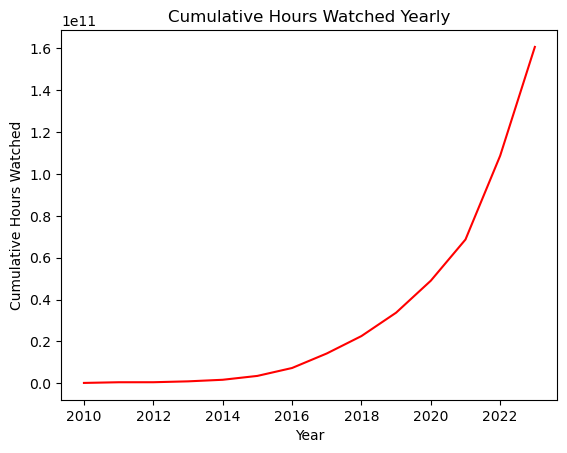

In [8]:
# Remove rows with NaT in 'release_date_parsed'
df_clean = df.dropna(subset=['release_date_parsed'])

# Extract the year from the cleaned 'release_date_parsed'
df_clean['release_year'] = df_clean['release_date_parsed'].dt.year

# Group by year and sum the hours watched
yearly_hours = df_clean.groupby('release_year')['Hours Viewed'].sum()

# Calculate the cumulative sum
cumulative_hours = yearly_hours.cumsum()

# Plotting
cumulative_hours.plot(kind='line', title='Cumulative Hours Watched Yearly', color='red')
plt.xlabel('Year')
plt.ylabel('Cumulative Hours Watched')
plt.show()

In [9]:
## Correcting issues within the 'Genre' column

# Replace '0' or any other placeholder values with np.nan
df['Genre'] = df['Genre'].replace('0', np.nan)

# Now, convert only the non-null values to strings and split by commas
df['Genre'] = df['Genre'].dropna().astype(str).str.split(',')

# Check the first few rows to confirm the column looks correct
print(df['Genre'].head())

0    [Biography,  Drama,  History]
1        [Comedy,  Drama, Romance]
2                          [Short]
3      [Drama,  History,  Romance]
4               [Comedy,  Romance]
Name: Genre, dtype: object


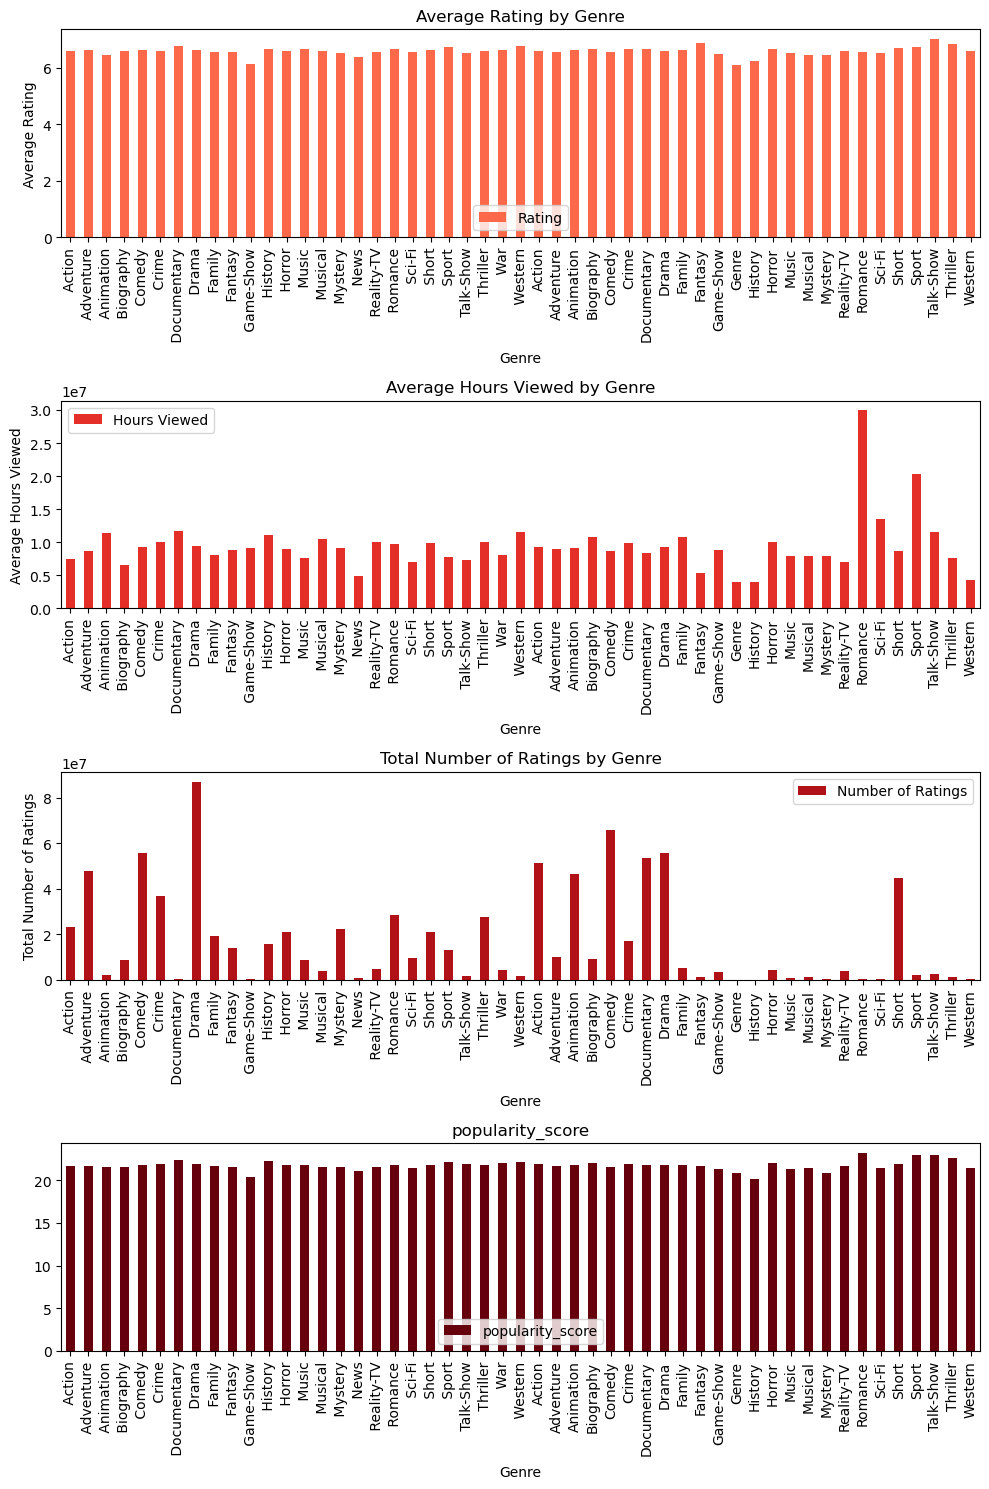

In [10]:
# Group by Genre and calculate required statistics
df_exploded = df.explode('Genre')
genre_stats = df_exploded.groupby('Genre').agg({'Rating': 'mean', 'Hours Viewed': 'mean', 'Number of Ratings': 'sum', 'popularity_score': 'mean'})

# Get the colormap and adjust its brightness
cmap = plt.get_cmap('Reds')
bright_cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', cmap(np.linspace(0.5, 1, 256)))

# Plotting
axes = genre_stats.plot(kind='bar', subplots=True, layout=(4, 1), figsize=(10, 15), sharex=False, cmap=bright_cmap)

# Set individual titles and labels for each subplot
axes[0][0].set_title('Average Rating by Genre')
axes[0][0].set_xlabel('Genre')
axes[0][0].set_ylabel('Average Rating')

axes[1][0].set_title('Average Hours Viewed by Genre')
axes[1][0].set_xlabel('Genre')
axes[1][0].set_ylabel('Average Hours Viewed')

axes[2][0].set_title('Total Number of Ratings by Genre')
axes[2][0].set_xlabel('Genre')
axes[2][0].set_ylabel('Total Number of Ratings')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Observations:

- People really love Romance!
- Average ratings are surprisingly similar.
- There seems to be an issue with the way that the number of ratings were tabulated.

- 사람들은 로맨스를 가장 좋아함
- 평균 평점은 유사함 > 평가 수가 집계된 방식에 문제가 있는 것으로 보임

In [11]:
# Convert 'Available Globally?' to a binary numeric column where 1 indicates Yes/Available and 0 indicates No/Not available
df_exploded['Available Globally?'] = df_exploded['Available Globally?'].map({'Yes': 1, 'No': 0})

# Group by 'Genre' and calculate the sum of 'hours viewed' and the mean of 'Available Globally?'
genre_popularity = df_exploded.groupby('Genre').agg({'Hours Viewed': 'sum', 'Available Globally?': 'mean'})

# Now calculate the correlation
correlation = genre_popularity.corr()

# Display the correlation matrix
display(correlation)

,Hours Viewed,Available Globally?
Hours Viewed,1.000000,0.195908
Available Globally?,0.195908,1.000000


### Observation:

- There is a slight tendency that as 'Available Globally?' increases (from not available to available), 'Hours Viewed' also increases, but the relationship is not strong.

In [12]:
# Group the data by 'Genre'
grouped = df_exploded.groupby('Genre')

# Define a function to calculate the correlation for each group
def calculate_correlation(group):
    return group['Hours Viewed'].corr(group['Available Globally?'])

# Apply the function to each genre group
genre_correlation = grouped.apply(calculate_correlation)

# Display the correlation by genre
print(genre_correlation.sort_values(ascending=False))

Genre
 Game-Show      0.720571
Sci-Fi          0.519211
Thriller        0.489827
Romance         0.303031
Sport           0.271221
Adventure       0.262827
Game-Show       0.238250
 Western        0.235565
 War            0.223612
Horror          0.200504
 Sci-Fi         0.200307
Family          0.194944
 Talk-Show      0.182074
Crime           0.173185
 Family         0.170196
Musical         0.169871
 Mystery        0.167260
 Romance        0.159914
Action          0.150314
 Sport          0.146316
 Music          0.139752
 History        0.134278
 Crime          0.132311
 Drama          0.131184
 Musical        0.129126
Short           0.122762
 Fantasy        0.122070
 Horror         0.120997
 Reality-TV     0.115812
Biography       0.109694
Comedy          0.102299
 Thriller       0.101192
 Action         0.098452
Documentary     0.096476
Mystery         0.095315
Music           0.091927
 Biography      0.090897
 Animation      0.086605
 Adventure      0.075043
Drama           0.0

### Observations:

- Game-show and Sci-Fi have the strongest positive correlations, which suggests that titles within these genres are likely to have higher watch times. This could mean these genres are particularly engaging or popular with audiences.
- Genres like 'Drama', 'Comedy', and 'Action' have lower positive correlations. They do have a positive relationship, but it's not as pronounced. This could be due to a variety of factors, including market saturation, varying quality within the genre, or simply a broader appeal with less intense engagement.
- There is repition in the genres, so this is worth additional future analysis.
- 게임쇼와 공상과학이 가장 강한 양의 상관 관계 > 이는 이러한 장르의 제목들이 더 높은 시청 시간을 가질 가능성이 높다는 것을 시사함
        - 이는 이러한 장르가 특히 관객들에게 매력적이거나 인기가 있을 수 있다는 것을 의미할 수 있습니다.
- '드라마', '코미디', '액션'과 같은 장르들은 상대적으로 더 낮은 양의 양의 상관 관계

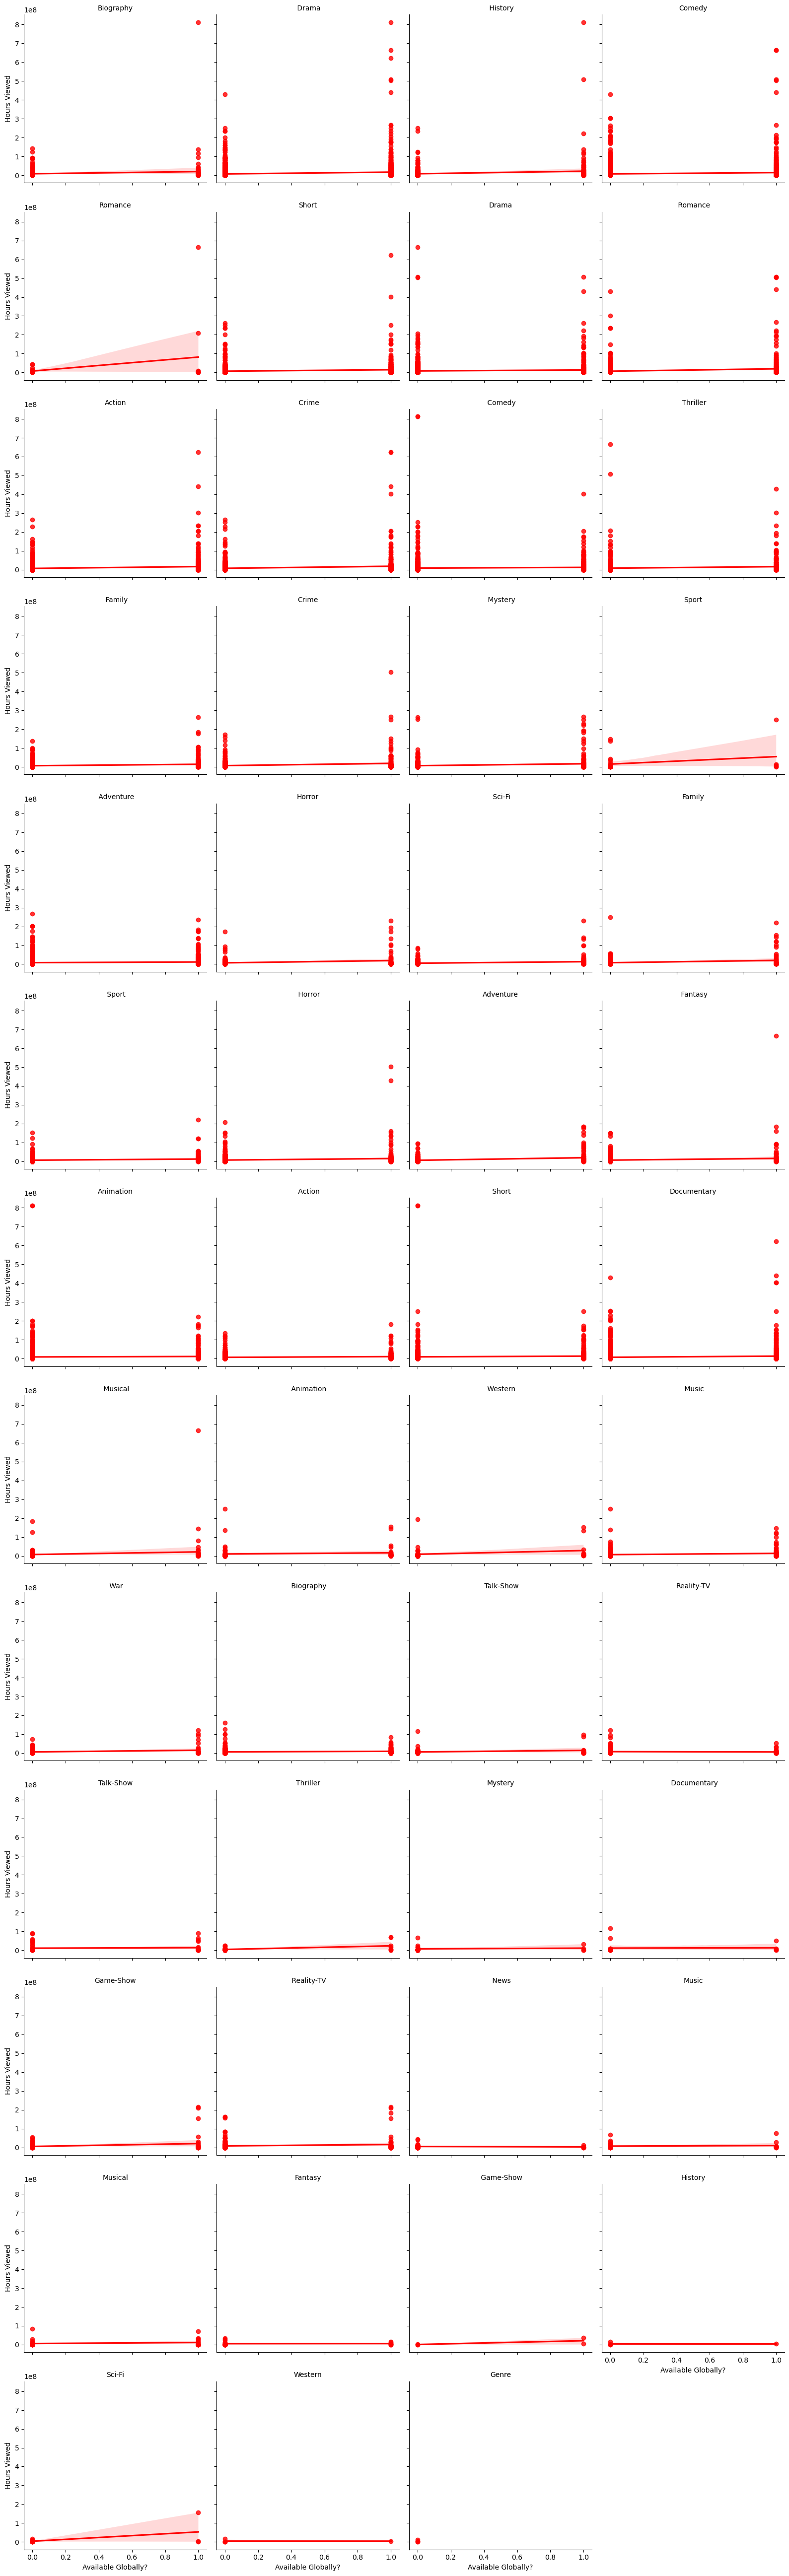

In [13]:
# Set up a FacetGrid to plot multiple genres
g = sns.FacetGrid(df_exploded, col='Genre', col_wrap=4, height=4, aspect=1)

# Map the regplot to the FacetGrid
g.map(sns.regplot, 'Available Globally?', 'Hours Viewed', color='red')

# Set up titles
g.set_titles("{col_name}")

# Show the plots
plt.tight_layout()
plt.show()

In [14]:
def top_shows(group):
    # Sort the group by 'Hours Viewed' and select top 10
    top = group.sort_values(by='Hours Viewed', ascending=False).head(10)
    # Concatenate 'Title' and 'Hours Viewed' into a single string for each show
    top['Show_Info'] = top['Title'] + ' (' + top['Hours Viewed'].astype(str) + ' hours viewed)'
    # Return only the concatenated info
    return top['Show_Info']

# Group by 'Genre' and apply the function to get top shows for each genre
top_shows_by_genre = df_exploded.groupby('Genre').apply(top_shows)

# Reset index to make the DataFrame tidy
top_shows_by_genre = top_shows_by_genre.reset_index(level=1, drop=True).reset_index()

# Rename columns for clarity
top_shows_by_genre.columns = ['Genre', 'Top Shows']

# Display the resulting DataFrame
display(top_shows_by_genre)

,Genre,Top Shows
0,Action,You People (181800000.0 hours viewed)
1,Action,The Cabin in the Woods (134800000.0 hours viewed)
2,Action,Kabir Singh // कबीर सिंह (120500000.0 hours vi...
3,Action,The Get Down: Part 2 (120300000.0 hours viewed)
4,Action,Mighty Express: Season 1 (118600000.0 hours vi...
...,...,...
484,Western,The Undateables (2012): Series 10 (15800000.0 ...
485,Western,Flavorful Origins: Gansu Cuisine // 風味原產地: 甘肅飲...
486,Western,Schitt's Creek: Season 2 (1200000.0 hours viewed)
487,Western,The Code (2009) (300000.0 hours viewed)


# Project Summary

Throughout this exploratory data analysis, we have navigated through the rich dataset of Netflix's streaming content, uncovering patterns and insights that speak to the platform's engagement and content strategy.

**Key Steps and Findings:**

- We started by **cleaning and preparing the data**, addressing duplicates, missing values, and formatting issues, particularly within the 'Genre' column. This step was foundational to ensure the accuracy of our subsequent analysis.
  
- We then **distinguished between TV shows and movies** by creating a new column, which allowed us to analyze trends within these content types more precisely.

- Our first major analysis involved **tracking the cumulative hours watched over the years**, revealing growth trends and potentially the impact of new content releases and global events on viewing habits.

- A deep dive into **genre-specific performance** showed us which genres are most successful in terms of average ratings, average hours viewed, and total ratings. This multi-faceted view helped us understand the content types that resonate with audiences.

- We created a **composite 'popularity score'** for each title, integrating various engagement metrics to establish a holistic measure of success. This score factored in normalized values of hours viewed, number of ratings, rating, and recency, giving us a single, comparable metric across all titles.

- **Genre correlations** were examined to determine the strength and direction of the relationship between genres and the defined popularity score. We observed that certain genres, like 'Game-Show' and 'Sci-Fi', showed a strong positive correlation, potentially indicating higher engagement or preference among viewers.

- By employing visualizations such as scatter plots with regression lines, we were able to explore and present these correlations for individual genres in a clear and informative manner.

**Conclusion:**

This analysis has provided valuable insights into the content engagement on Netflix. The findings from this project can inform content creation, acquisition strategies, and provide a benchmark for measuring content performance. As the streaming market continues to evolve, such data-driven approaches will be crucial in shaping the strategic direction of content platforms like Netflix.

Future steps could include further refining the popularity score, exploring other potential correlations, and perhaps extending the analysis to include viewer demographics for a more targeted understanding of preferences (if that data ever becomes available).


프로젝트 요약

이 탐색적 데이터 분석을 통해 넷플릭스의 스트리밍 콘텐츠의 풍부한 데이터 세트를 탐색하면서 플랫폼의 참여 및 콘텐츠 전략에 대한 패턴과 통찰을 발견했습니다.

주요 단계 및 결과:

먼저 데이터를 정리하고 준비하면서 중복, 결측값 및 형식 문제를 해결했습니다. 특히 '장르' 열 내에서 이러한 문제에 대응했습니다. 이 단계는 후속 분석의 정확성을 보장하기 위한 기초적인 작업이었습니다.

그런 다음, 새로운 열을 만들어 TV 프로그램과 영화를 구분하여 이러한 콘텐츠 유형 내의 추세를 더 정확하게 분석할 수 있었습니다.

첫 번째 주요 분석은 연도별 누적 시청 시간을 추적하여 성장 추세와 새로운 콘텐츠 릴리스 및 글로벌 이벤트가 시청 습관에 미칠 수 있는 영향을 밝혔습니다.

장르별 성능에 대한 심층 분석은 평균 평점, 평균 시청 시간 및 총 평가 수를 기준으로 어떤 장르가 가장 성공적인지를 보여주었습니다. 이러한 다각도의 관점은 관객들과 공감하는 콘텐츠 유형을 이해하는 데 도움이 되었습니다.

각 제목에 대한 **종합적인 '인기도 점수'**를 생성하여 성공의 종합적인 측정 지표를 확립했습니다. 이 점수는 시청 시간, 평가 수, 평점 및 최근성의 정규화된 값을 고려하여 모든 제목에 대한 단일하고 비교 가능한 지표를 제공했습니다.

장르 간의 상관 관계를 조사하여 장르와 정의된 인기도 점수 간의 관계의 강도와 방향을 결정했습니다. '게임쇼'와 '공상과학'과 같은 특정 장르가 강한 양의 상관 관계를 보여 관객들 사이에서 더 높은 참여나 선호도를 시사할 수 있다는 것을 관찰했습니다.

회귀선이 있는 산점도와 같은 시각화를 활용하여 각 장르에 대한 이러한 상관 관계를 명확하고 정보적인 방식으로 탐색하고 제시할 수 있었습니다.

결론:

이 분석은 넷플릭스의 콘텐츠 참여에 대한 가치 있는 통찰력을 제공했습니다. 이 프로젝트의 결과는 콘텐츠 제작, 확보 전략을 안내하고 콘텐츠 성능을 측정하는 기준을 제공할 수 있습니다. 스트리밍 시장이 계속 발전함에 따라 넷플릭스와 같은 콘텐츠 플랫폼의 전략적 방향을 형성하는 데 이러한 데이터 기반 접근 방식은 중요할 것입니다.

추후 단계에는 인기도 점수를 더욱 정제하고 다른 잠재적인 상관 관계를 탐색하며, 미래에는 보다 타겟팅된 선호도를 이해하기 위해 뷰어 인구 통계를 포함하여 분석을 확장하는 것이 있습니다.